<a href="https://colab.research.google.com/github/Hash-if-vs/AI-Indian-Legal-Assistant/blob/main/bluescore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Legal Advisor/Data/bleudataset.csv")

In [ ]:
df = df[~df['prompt'].str.contains('Summarize')]

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Initialize an empty list to store BLEU scores
bleu_scores = []

# Iterate through each row in the dataset
for index, row in df.iterrows():
    reference = [row['expected output'].split()]  # Reference sentence (human-generated)
    candidate = row['generated output'].split()   # NLP-generated output

    # Define your desired weights (example: higher weight for bi-grams)
    weights = (0.25, 0.25, 0, 0)  # Weights for uni-gram, bi-gram, tri-gram, and 4-gram

    # Calculate BLEU score for the current row
    score = sentence_bleu(reference, candidate, weights=weights)
    bleu_scores.append(score)

# Add the BLEU scores to the dataset
df['BLEU Score'] = bleu_scores


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [ ]:
df

,prompt,expected output,generated output,BLEU Score
1,<s>[INST]\nDraft a hypothetical bail applicati...,"\n{ ""To"": ""The Honorable Court"", ...",IN THE HIGH COURT OF JUDICATURE AT MADRAS BA...,0.160848
4,<s>[INST]Below is an instruction that describe...,The case of Indra Sawhney v. Union of India ha...,The case Indra Sawhney v. Union of India has s...,0.629337
7,<s>[INST]Below is an instruction that describe...,The legal context of the case Miss Laila Chack...,The case of Miss Laila Chacko And Ors. vs Stat...,0.358330
8,<s>[INST]Below is an instruction that describe...,"To avoid a similar issue as in the given case,...",1. Conduct thorough research on the relevant...,0.511512
10,<s>[INST]Below is an instruction that describe...,"""Given the Supreme Court's decision in the cas...",1. What steps are being taken by the governm...,0.368729
13,<s>[INST]Below is an instruction that describe...,In the light of Bachan Singh vs State of Punja...,A potential public interest litigation could b...,0.367843
18,<s>[INST]Below is an instruction that describe...,"Yes, a person who holds or has held the office...","No, a person who has served as President of In...",0.376173
19,<s>[INST]Below is an instruction that describe...,The decision in the case of Jarnail Singh vs L...,The decision in the case of Jarnail Singh v...,0.539307
21,<s>[INST]\nDiscuss potential legislative respo...,\nThe decision in the case of University of Ma...,\nThe decision in the case of M/S.Raju Constru...,0.424491
22,<s>[INST]\nFormulate a potential public intere...,\nA potential public interest litigation (PIL)...,A potential public interest litigation (PIL)...,0.465611


from matplotlib import pyplot as plt
df['BLEU Score'].plot(kind='hist', bins=20, title='BLEU Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['BLEU Score'].plot(kind='line', figsize=(8, 4), title='BLEU Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['BLEU Score'].plot(kind='hist', bins=20, title='BLEU Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='BLEU Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['BLEU Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('BLEU Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['BLEU Score'].plot(kind='line', figsize=(8, 4), title='BLEU Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#bleuscore of llama2-indianlegal
df['BLEU Score'].mean()

0.44182902466038815

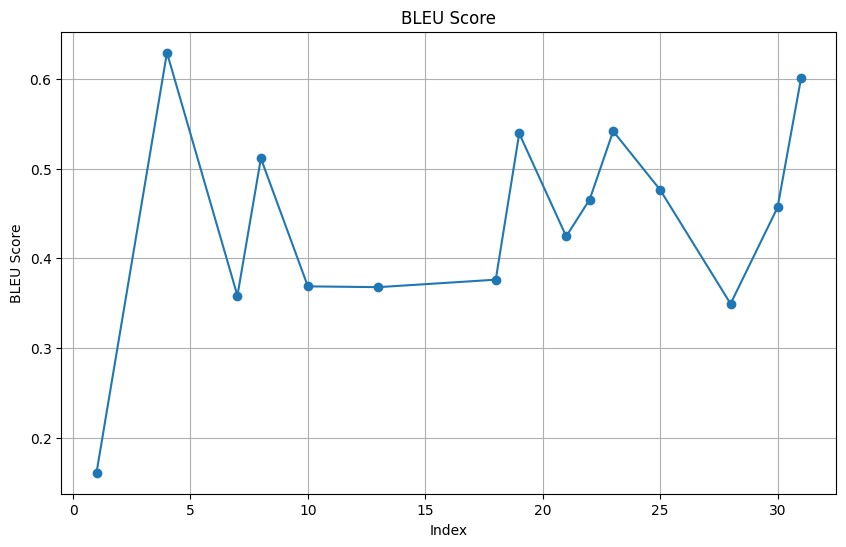

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['BLEU Score'], marker='o', linestyle='-')
plt.title('BLEU Score')
plt.xlabel('Index')
plt.ylabel('BLEU Score')
plt.grid(True)
plt.show()